In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
from IPython.display import display 

import warnings
warnings.filterwarnings('ignore')

In [2]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

## 2. 지도 학습

### 2.1 분류와 회귀

#### 분류 (Classfication)

- 이진분류 (Binary classfication) : 질문의 답이 예/아니오 만 나올 수 있또록 하는 것

- 다중분류 (Multiclass classfication) : 예를들어 웹사이트의 글로부터 어떤 언어의 웹사인지를 예측하는 것이 있습니다. 여기서 클래스는 미리 만들어놓은 언어 목록이 됩니다.

#### 회귀 (Regression)

- 회귀 : 연속적인 숫자, 또는 프로그래밍 용어로 말하면 부동소수점수(실수)를 예측하는 것

### 2.2 일반화, 과대적합, 과소적합

#### 일반화 
- 모델이 처음보는 데이터에 대해 정확하게 예측 할 수 있으면 이를 훈련세트에서 테스트세틑로 일반화 되었다고 한다.

#### 과대적합
- 모델이 훈련세트의 각 샘플에 너무 가깝게 맞춰져서 새로운 데이터에 일반화 되기 어려울때 일어난다.

#### 과소적합
- "집이 있는 사람은 모두 요트를 사려고 한다"와 같이 데이터의 면면과 다양성을 잡아내지 못하고 훈련세트에도 잘 맞지 않는 것

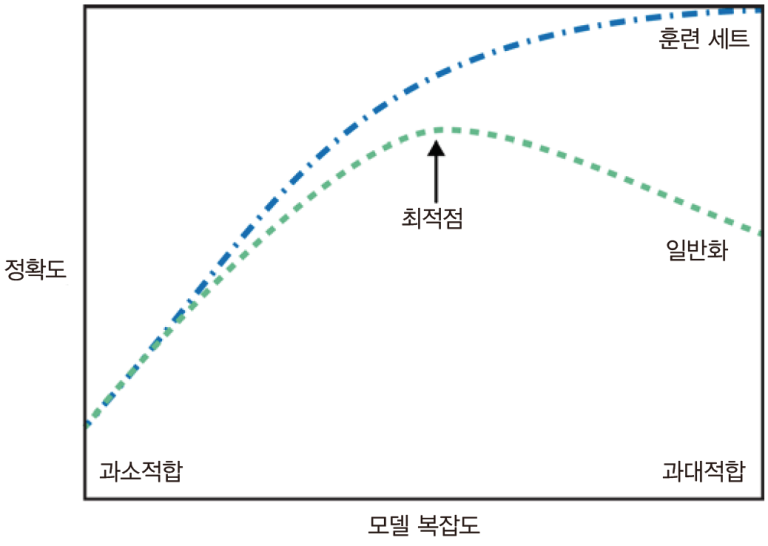

In [3]:
from IPython.display import Image
Image ('./data/model_01.png', width=400)

### 2.3 지도학습 알고리즘

X.shape : (26, 2)


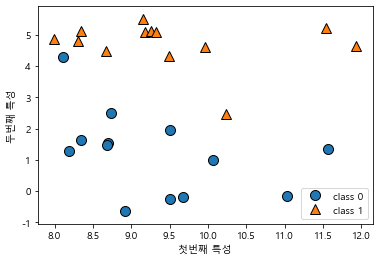

In [4]:
# 데이터셋을 만든다.
X, y = mglearn.datasets.make_forge()

# 산점도 생성
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["class 0", "class 1"], loc=4)
plt.xlabel("첫번째 특성")
plt.ylabel("두번째 특성")
print("X.shape :", X.shape)

Text(0, 0.5, '타깃')

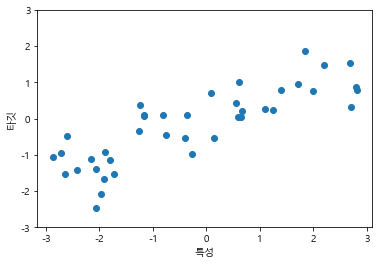

In [5]:
X, y = mglearn.datasets.make_wave(n_samples = 40)
plt.plot (X, y, 'o')
plt.ylim (-3, 3)
plt.xlabel("특성")
plt.ylabel("타깃")

In [6]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [7]:
print("cancer.keys():\n", cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [8]:
print("유방암 데이터의 형태 :", cancer.data.shape)

유방암 데이터의 형태 : (569, 30)


In [9]:
print("클래스별 샘플 개수:\n",
     {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

클래스별 샘플 개수:
 {'malignant': 212, 'benign': 357}


In [10]:
from sklearn.datasets import load_boston
boston = load_boston


In [11]:
X, y = mglearn.datasets.load_extended_boston()
print('X.shape :', X.shape)

X.shape : (506, 104)


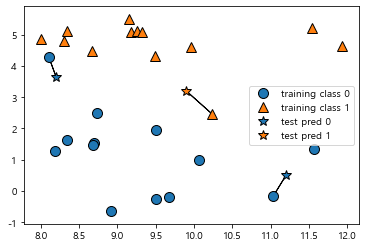

In [12]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

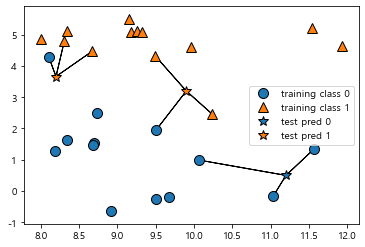

In [13]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [14]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 3)

In [16]:
clf.fit (X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [17]:
print ("테스트 셋트 예측 :", clf.predict(X_test))

테스트 셋트 예측 : [1 0 1 0 1 0 0]


In [18]:
print ("테스트 셋트 정확도 : {:.2f}".format(clf.score(X_test, y_test)))

테스트 셋트 정확도 : 0.86


#### KNeighborsClassifier

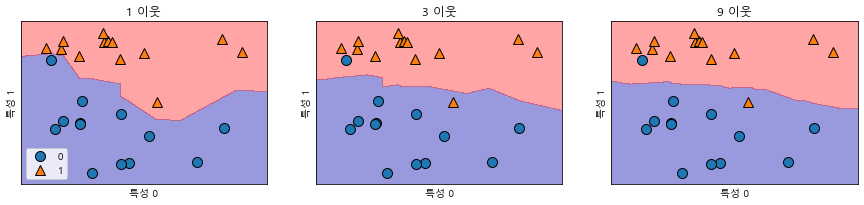

In [19]:
fig, axes = plt.subplots(1, 3, figsize = (15,3))

for n_neighbors, ax in zip([1, 3, 9], axes) :
    # fit 메소드는 self 오브젝트를 리턴합니다
    # 그래서 객체 생성과 fit 메소드를 한줄에 쓸 수 있습니다.
    clf = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha = .4)
    mglearn.discrete_scatter(X[:,0], X[:, 1], y, ax=ax)
    ax.set_title('{} 이웃'.format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc=3)

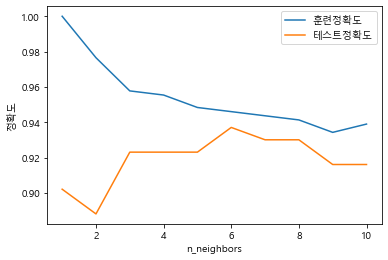

In [20]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    stratify=cancer.target,
                                                    random_state=66)
training_accuracy = []
test_accuracy = []

# 1 에서 10 까지 n_neighbors 를 적용
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings :
    
    # 모델생성
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    
    # 훈련셋트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    
    # 일반화 정확도 저장
    test_accuracy.append (clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="훈련정확도")
plt.plot(neighbors_settings, test_accuracy, label="테스트정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()

#### K-최근접 이웃 회귀

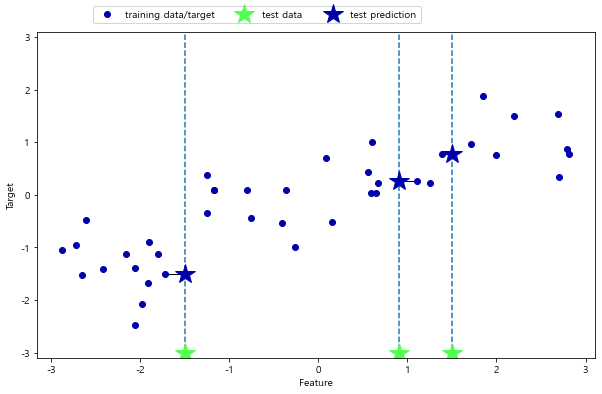

In [21]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

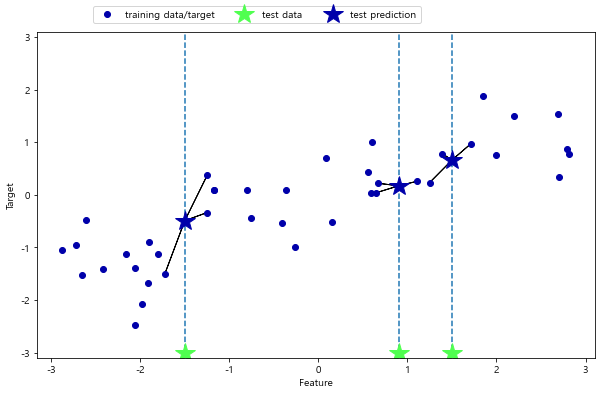

In [22]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [23]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# wave 데이터셋을 훈련세트와 테스트 셋트로 나눈다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 이웃의 수를 3으로 하여 모델의 객체를 만듭니다.
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [24]:
print('테스트 셋트 예측:\n', reg.predict(X_test)) 

테스트 셋트 예측:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [25]:
print('테스트 셋트 R^2 : {:.2f}'.format(reg.score(X_test, y_test)))

테스트 셋트 R^2 : 0.83


#### KNeighborsRegressor 분석

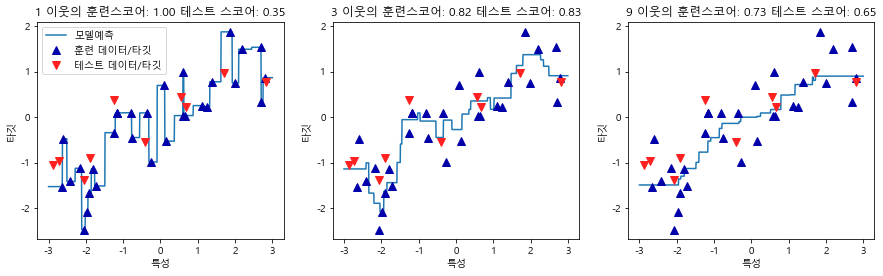

In [26]:
fig, axes = plt.subplots(1,3, figsize=(15,4))

# -3 과 3 tkdldp 1000 개의 데이터 포인트를 만듭니다.
line = np.linspace(-3, 3, 1000).reshape(-1,1)
for n_neighbors, ax in zip([1,3,9], axes):
    
    # 1, 3, 9 이웃을 사용한 예측을 합니다
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize = 8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize = 8)
    
    ax.set_title(
                "{} 이웃의 훈련스코어: {:.2f} 테스트 스코어: {:.2f}".format(
                n_neighbors, reg.score(X_train, y_train),
                reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
axes[0].legend(['모델예측',
               '훈련 데이터/타깃',
               '테스트 데이터/타깃'],
              loc='best')

   

#### 2.3.3 선형모델

#### 회귀의 선형모델

w[0]: 0.393906  b: -0.031804


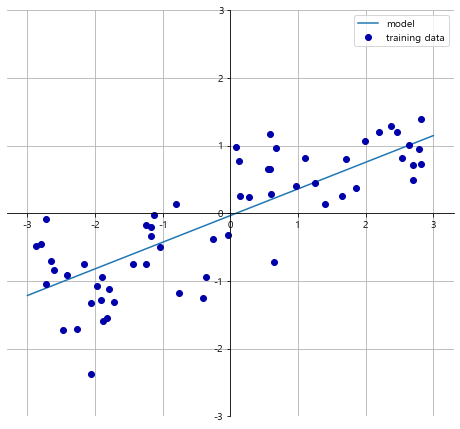

In [27]:
mglearn.plots.plot_linear_regression_wave()

#### 선형회귀 (최소제곱법)

- 가장 간단하고 오래된 회귀용 선현 알고리즘
- 선형회귀는 예측과 훈련셋트에 있는 타깃 y 사이의 평균제곱오차를 최소화 하는 파라미터 w 와 b 를 찾는다.
- 평균제곱오차는 예측값과 타깃값의 차이를 제곱하여 더한 후에 샘플의 갯수로 나눈 것

In [28]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [29]:
lr = LinearRegression().fit(X_train, y_train)

In [30]:
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [31]:
print("훈련 셋트 점수 : {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 셋트 점수 : {:.2f}".format(lr.score(X_test, y_test)))

훈련 셋트 점수 : 0.67
테스트 셋트 점수 : 0.66


In [32]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
lr = LinearRegression().fit(X_train, y_train)

In [33]:
print("훈련 셋트 점수 : {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 셋트 점수 : {:.2f}".format(lr.score(X_test, y_test)))

훈련 셋트 점수 : 0.95
테스트 셋트 점수 : 0.61


#### 리지 회귀
- 가중치(w) 선택은 훈련 데이터를 잘 예측하기 위해서 뿐만 아니라 추가 제약 조건을 만족시키기 위한 목적도 있다.
- 가중치의 절댓값을 가능한 한 작게 만드는 것 (w의 모든 원소가 0에 가깝게 되길 원함)

In [35]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("훈련 셋트 점수 : {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 셋트 점수 : {:.2f}".format(ridge.score(X_test, y_test)))

훈련 셋트 점수 : 0.89
테스트 셋트 점수 : 0.75


- Ridge는 모델을 단순하게 해주고 훈련셋트에 대한 성능 사이를 절충할 수 있는 방법을 제공
- 사용자는 